<a href="https://colab.research.google.com/github/WENDELLDELIMA/employee-performance-prediction-neural-networks/blob/main/Recursos_Humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacao das bibliotecas e base de dados

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
employee_df = pd.read_csv('/content/Human_Resources.csv')

In [6]:
employee_df.shape

(1470, 35)

In [7]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [10]:
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

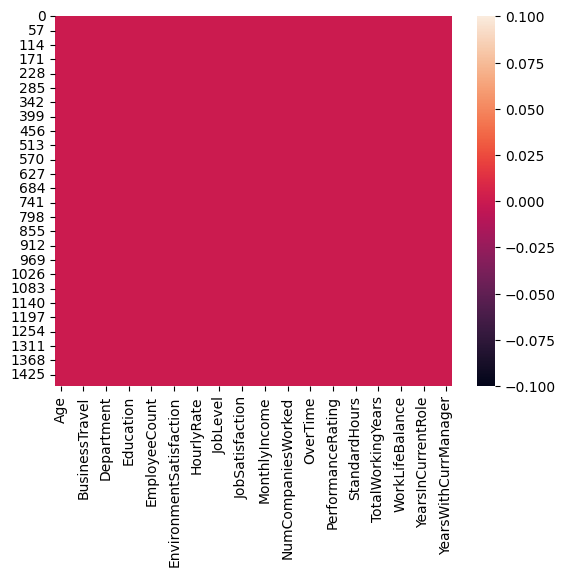

In [12]:
#verificando se tem dados nulos no dataframe

sns.heatmap(employee_df.isnull());

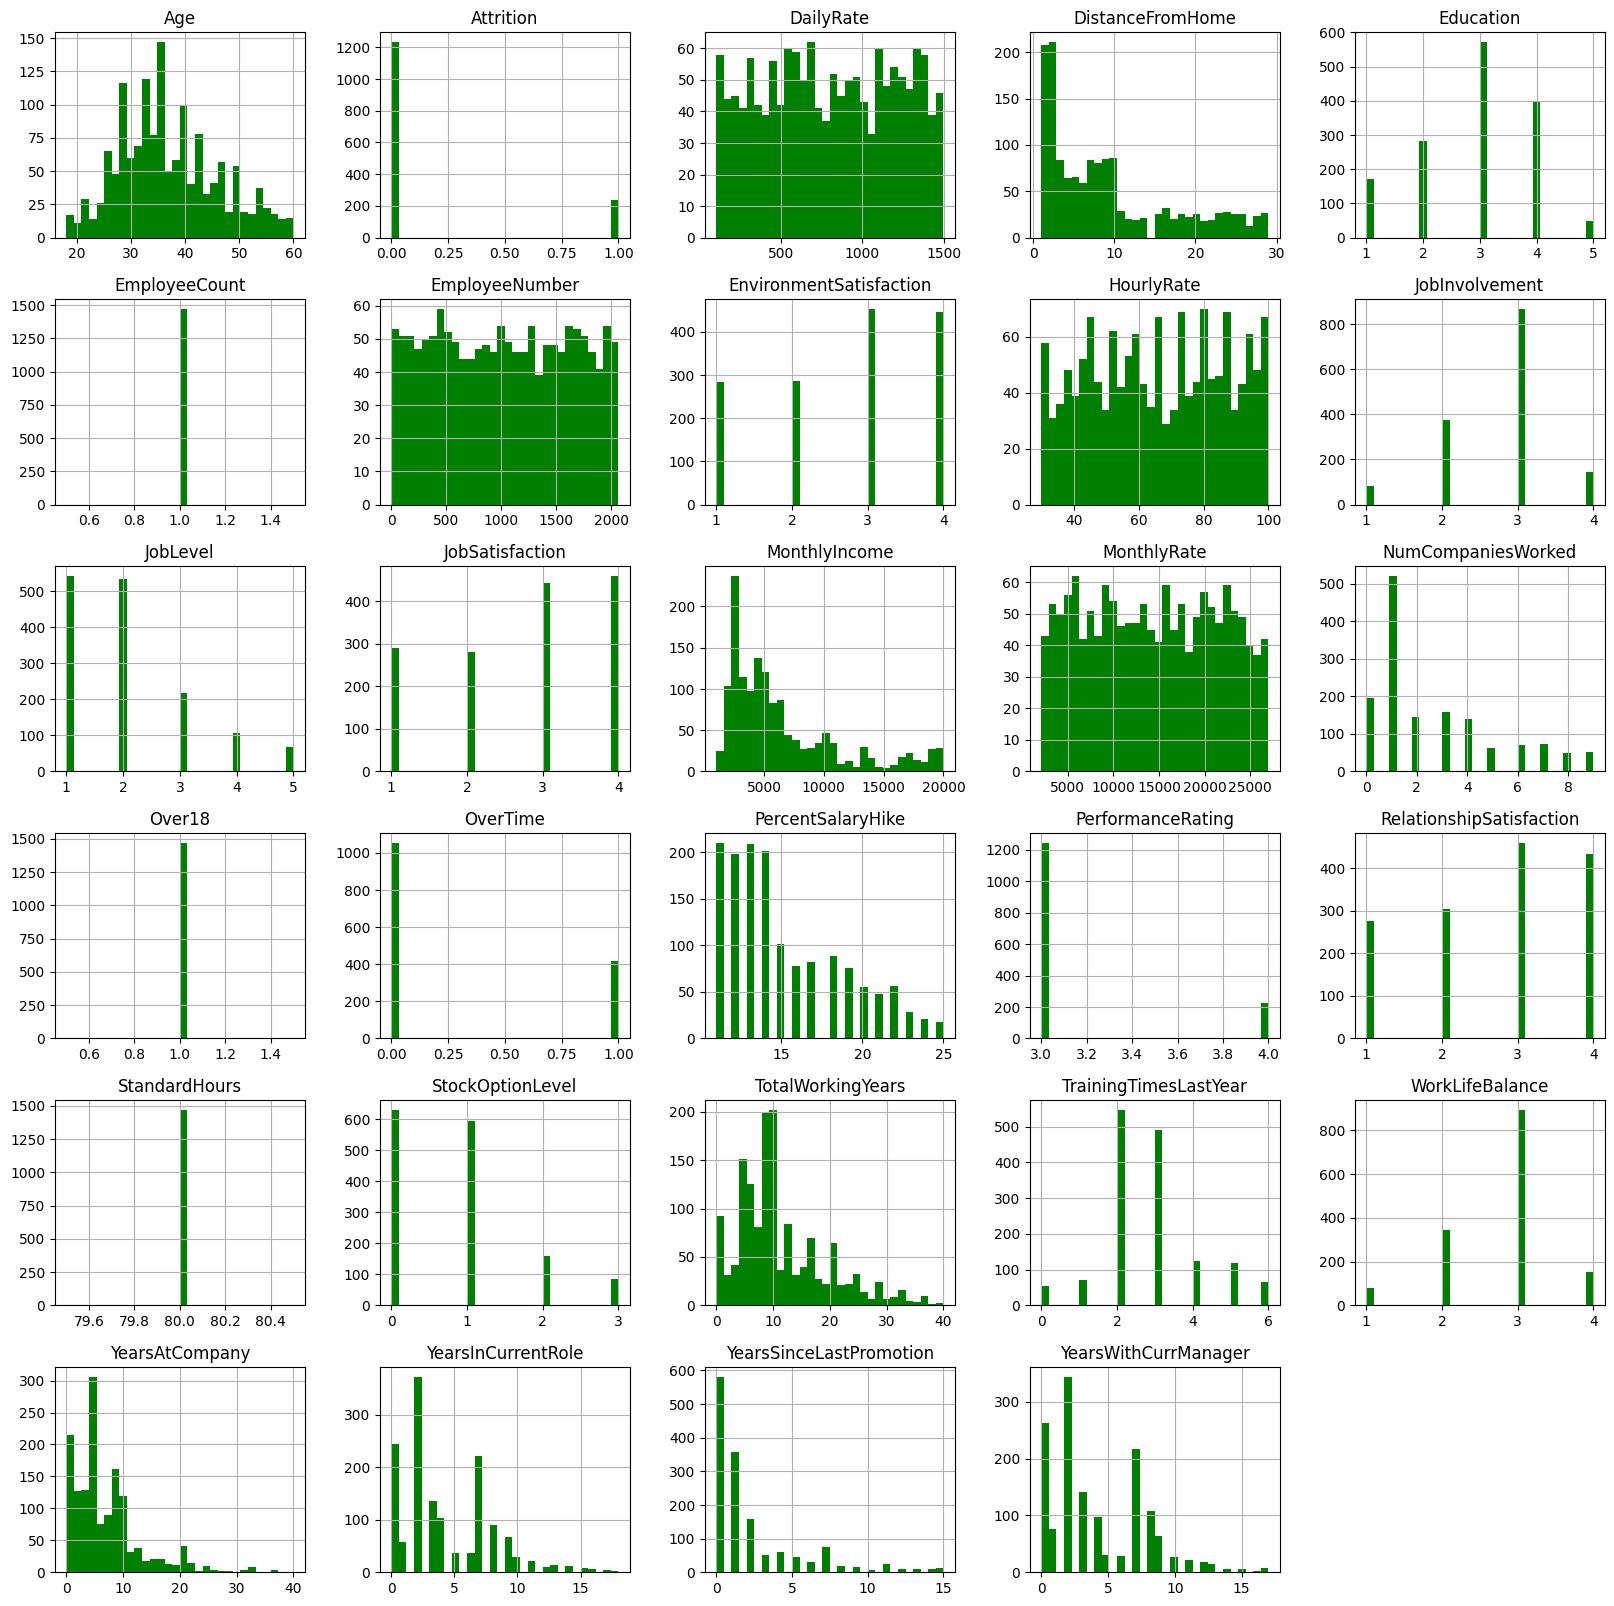

In [13]:
employee_df.hist(bins = 30, figsize=(20,20), color='g');

In [14]:
employee_df.drop(['EmployeeCount', 'StandardHours','Over18','EmployeeNumber'], axis = 1, inplace = True)

In [15]:
employee_df.shape

(1470, 31)

In [16]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [17]:
print('Total = ', len(employee_df))
print('Funcionarios que sairam = ', len(left_df))
print('Funcionarios que continuam = ', len(stayed_df))

Total =  1470
Funcionarios que sairam =  237
Funcionarios que continuam =  1233


In [18]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


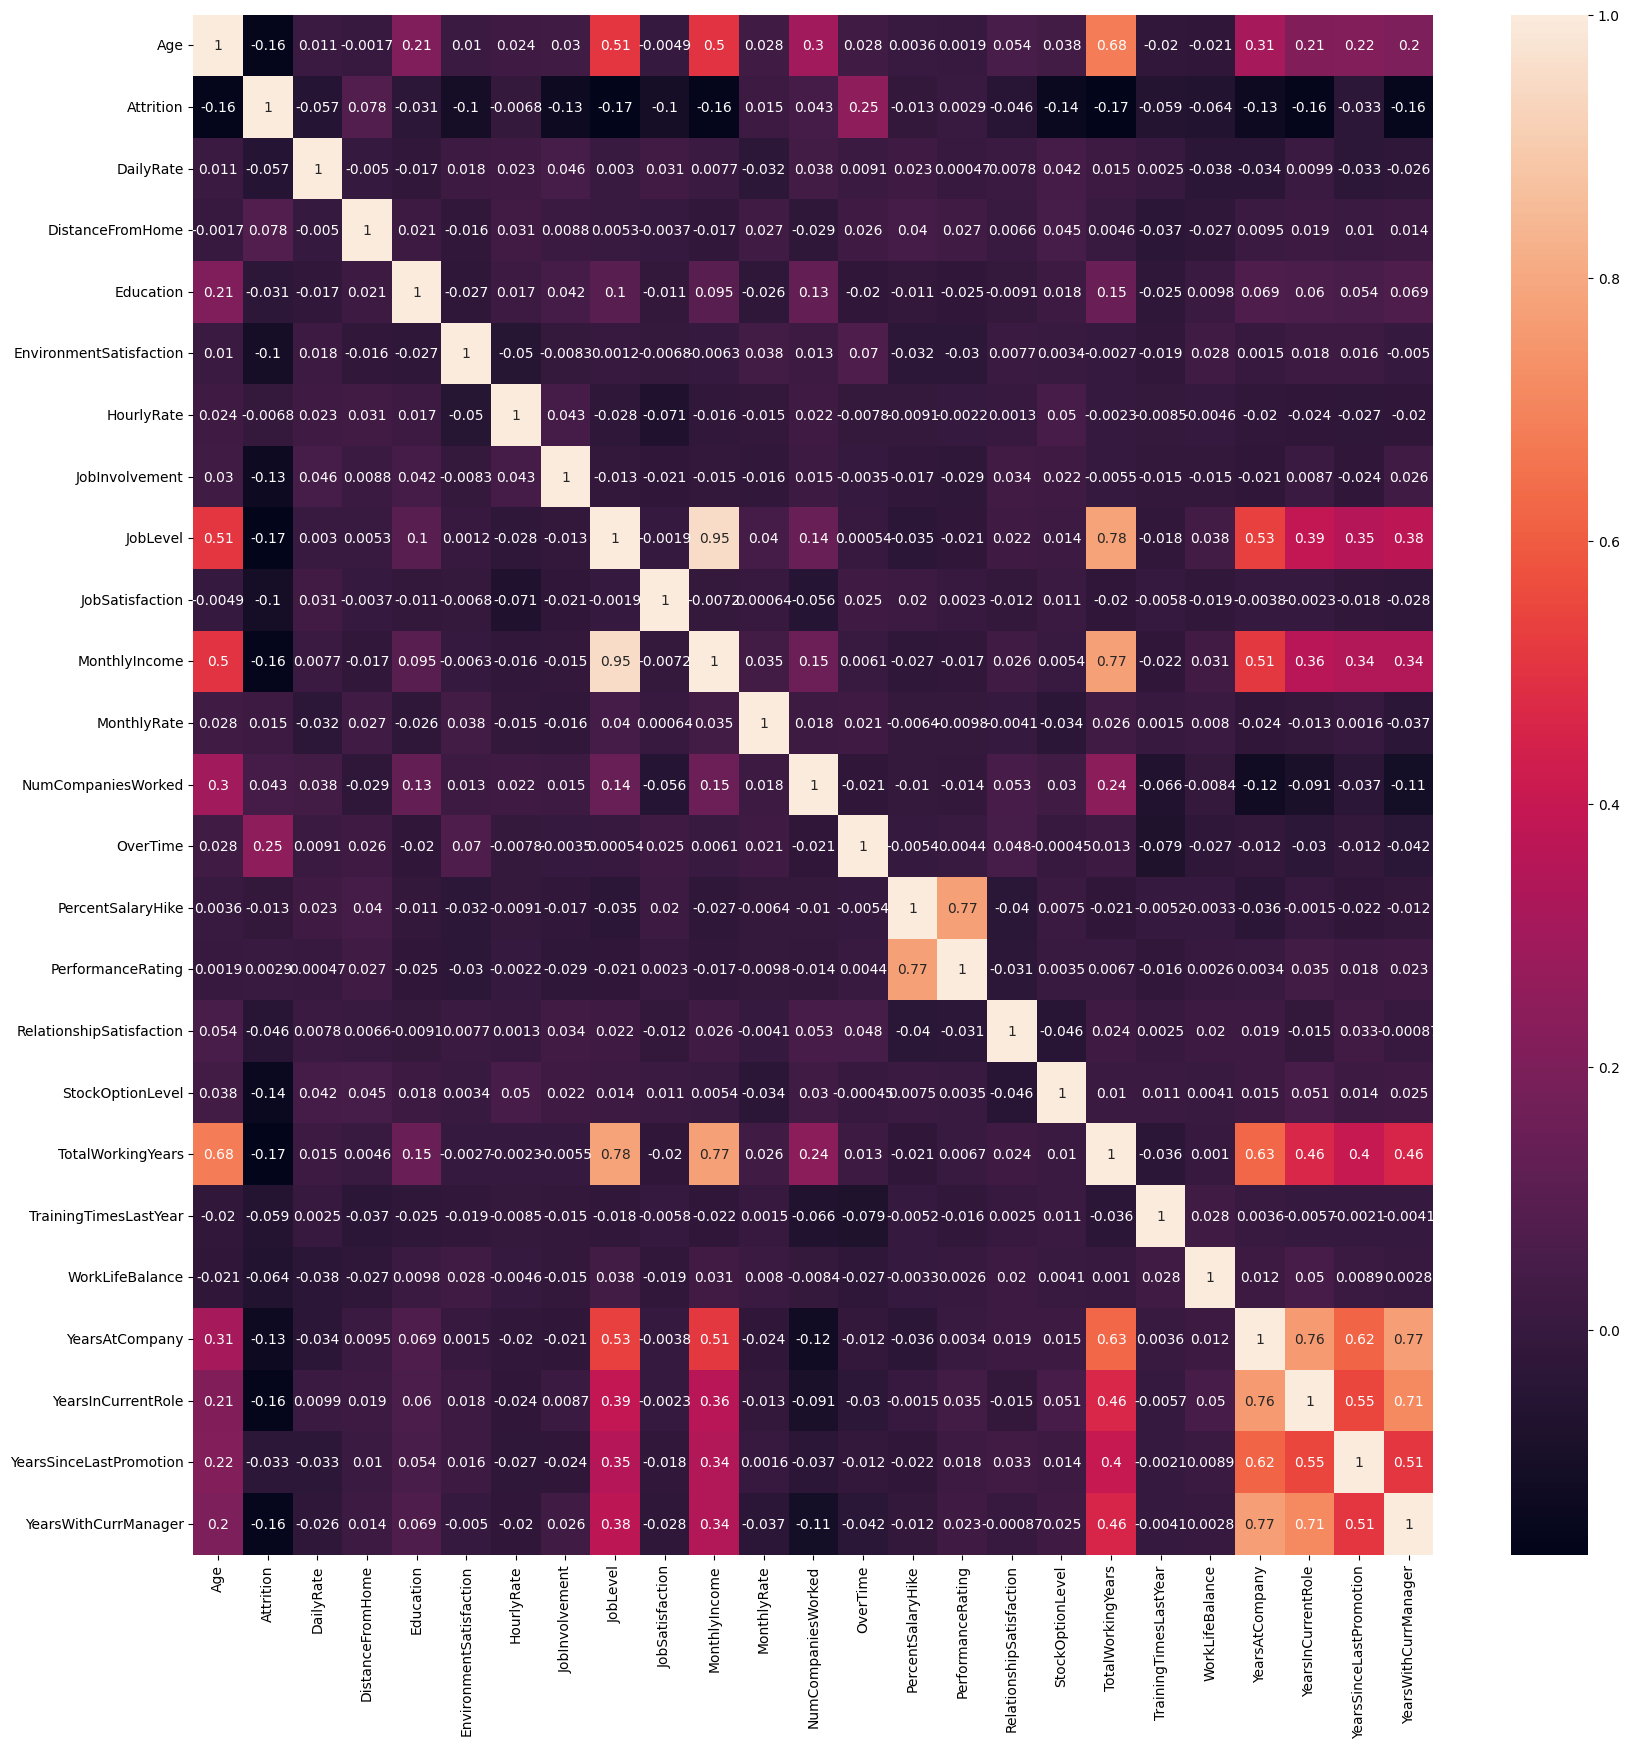

In [48]:
correlations = employee_df.select_dtypes(include=['number']).corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# Salvar a plotagem em um arquivo de imagem
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()

<Axes: xlabel='Age', ylabel='count'>

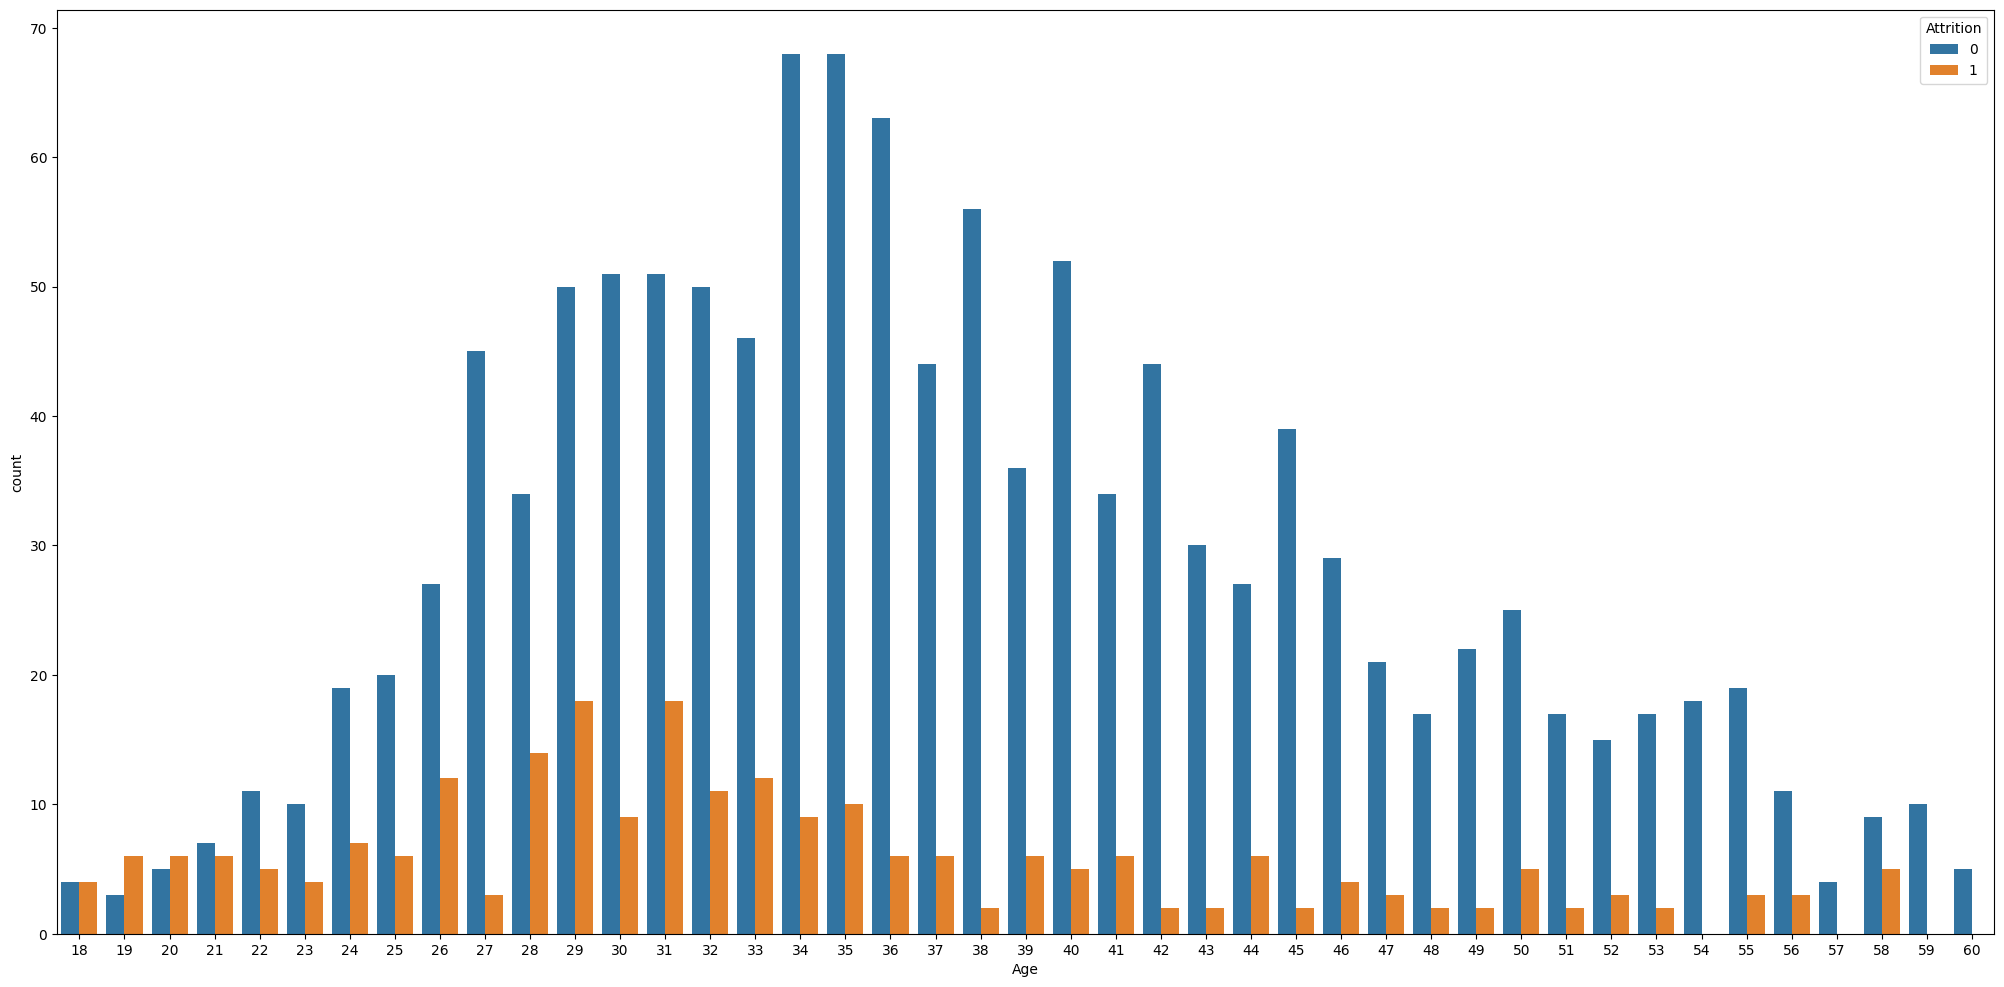

In [20]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age',  hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

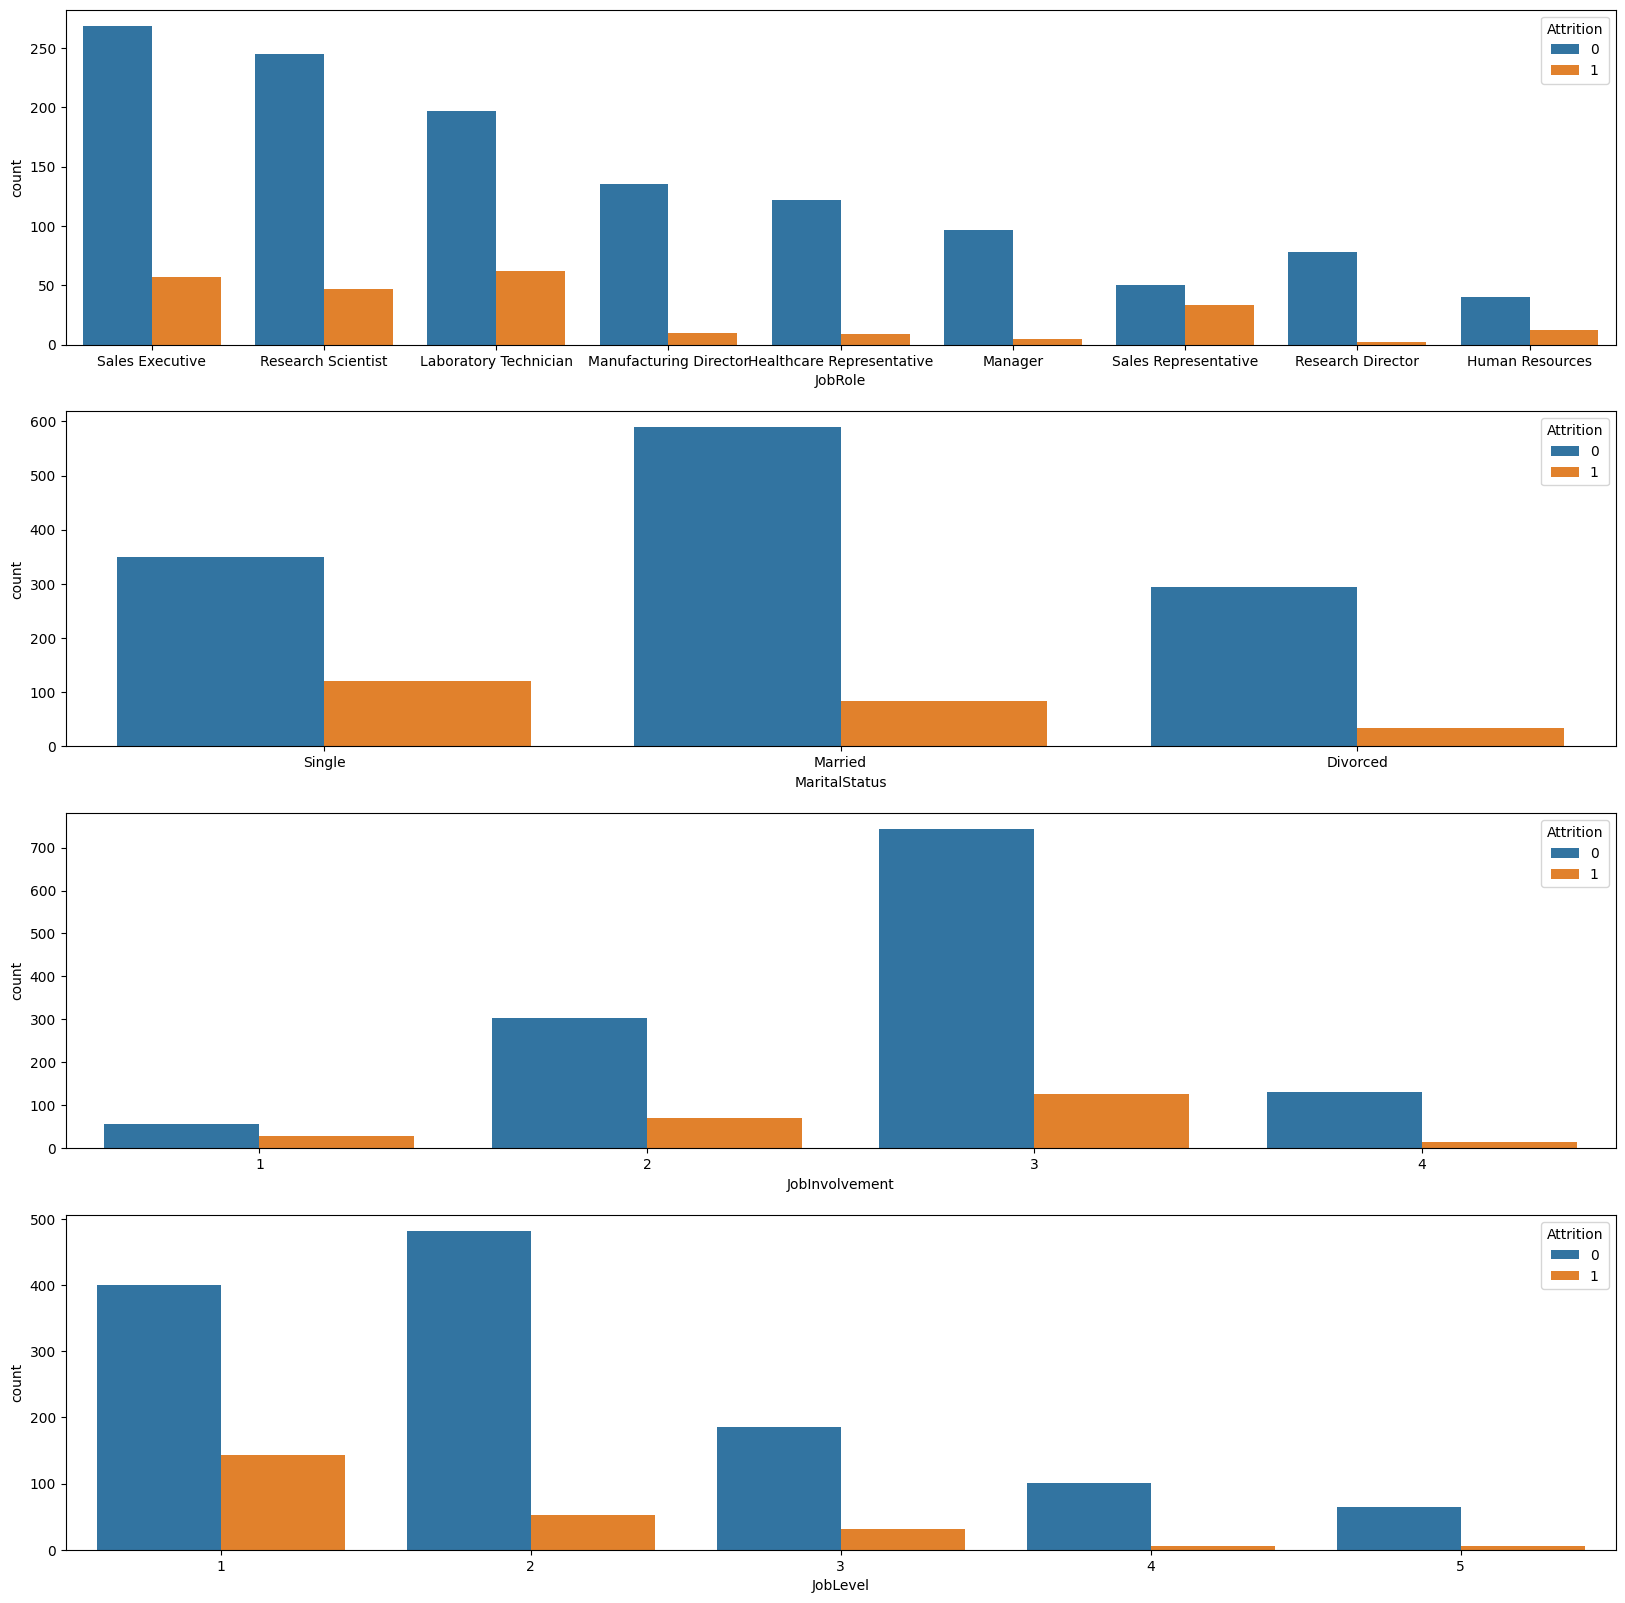

In [21]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

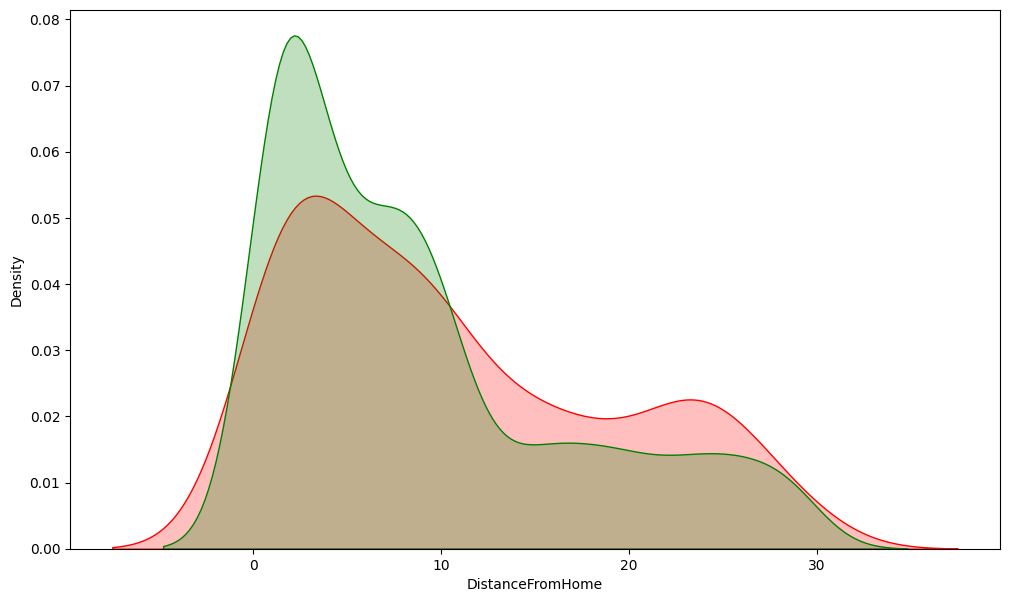

In [22]:
# KDE (Kernel Density Estimate)
plt.figure(figsize =(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionarios que Sairam da empresa', fill = True, color = 'r');
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionarios que Não Sairam da empresa', fill = True, color = 'g');

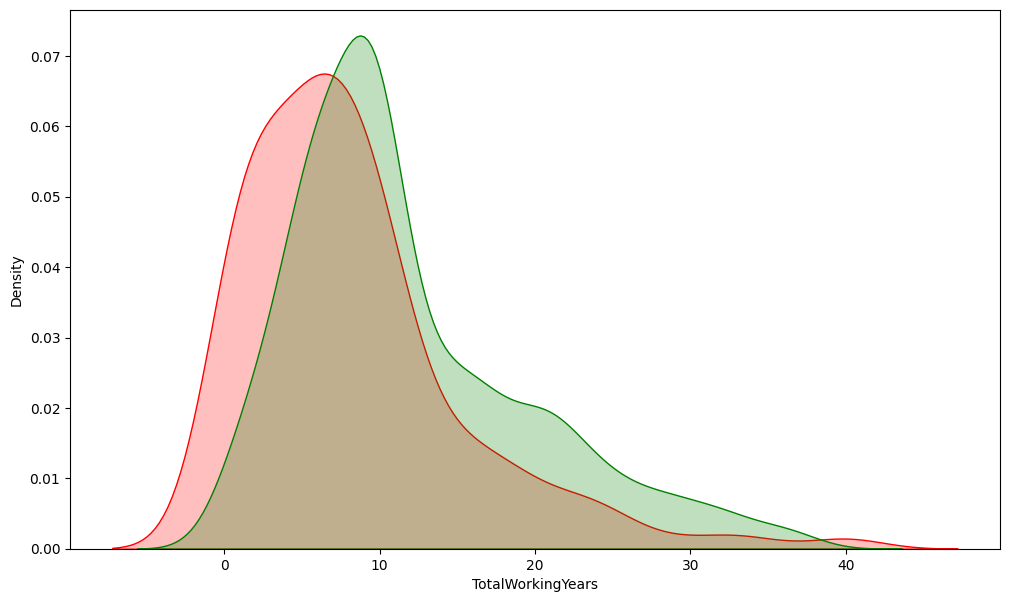

In [23]:
# KDE (Kernel Density Estimate)
plt.figure(figsize =(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionarios que Sairam da empresa', fill = True, color = 'r');
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionarios que Não Sairam da empresa', fill = True, color = 'g');

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

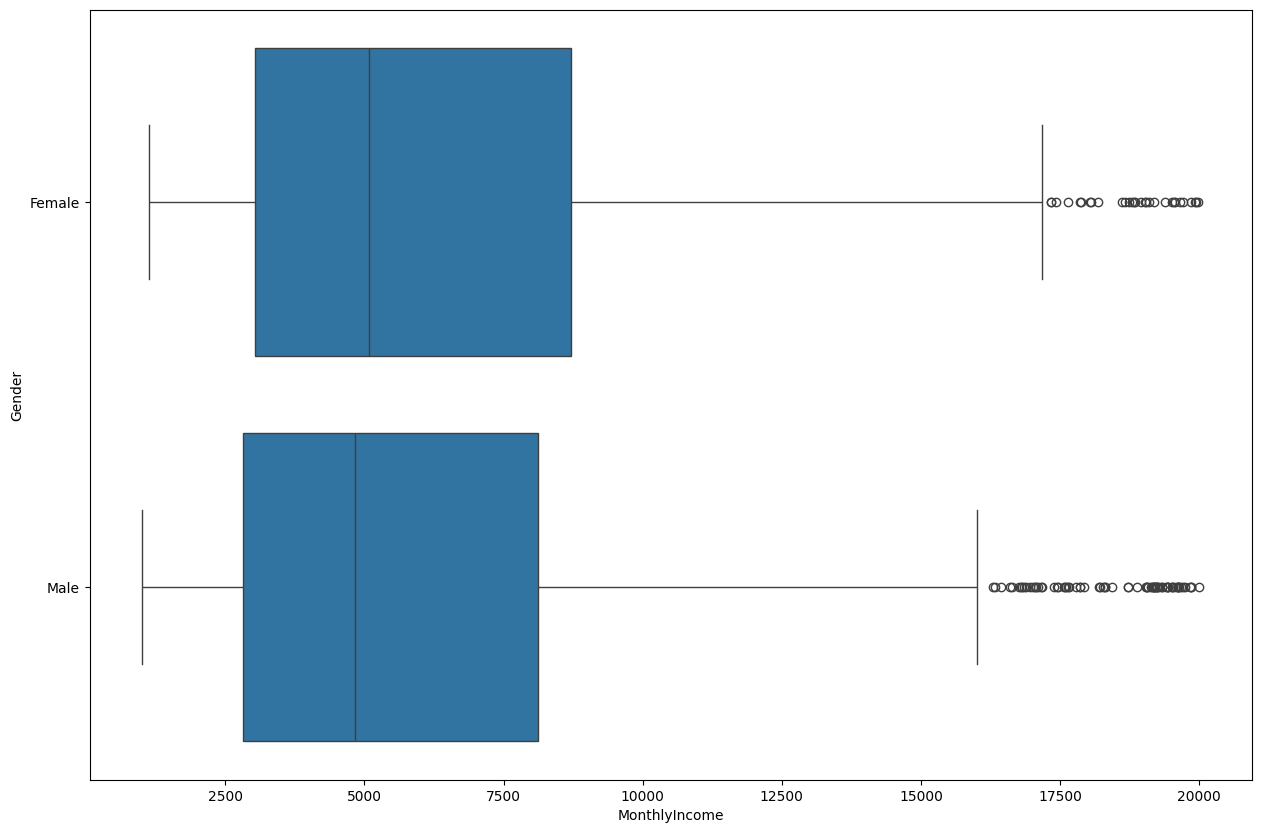

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

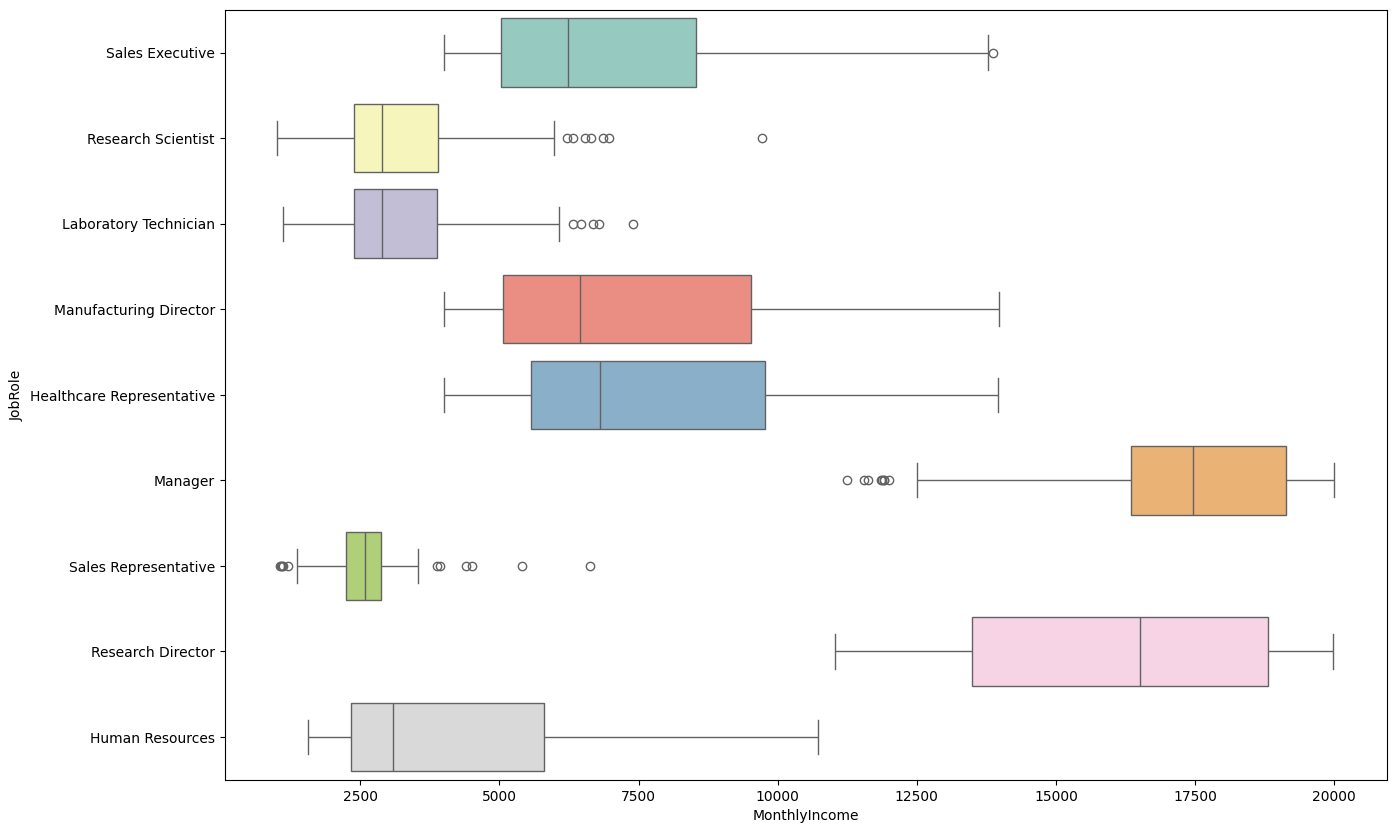

In [25]:
plt.figure(figsize = (15,10))
sns.boxplot(x= 'MonthlyIncome', y = 'JobRole', data = employee_df, hue='JobRole',palette="Set3");


# Pré-processamento e bases de treinamento/teste


In [26]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [27]:
X_cat = employee_df[['BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [29]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
X_numerical = employee_df.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','Attrition'])
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [31]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [34]:
# Converte todos os nomes de colunas para strings
X_all.columns = X_all.columns.astype(str)

# Agora você pode aplicar o MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)



In [35]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [36]:
y = employee_df['Attrition']
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [38]:
X_train.shape, y_train

((1102, 50),
 1125    0
 927     0
 388     0
 670     0
 449     0
        ..
 206     0
 156     0
 550     0
 1098    0
 399     0
 Name: Attrition, Length: 1102, dtype: int64)

In [39]:
X_test.shape, y_test

((368, 50),
 1191    0
 1252    0
 342     0
 571     0
 1441    0
        ..
 145     0
 1094    0
 241     0
 595     1
 1165    0
 Name: Attrition, Length: 368, dtype: int64)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

0.8858695652173914

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[303,   7],
       [ 35,  23]])

<Axes: >

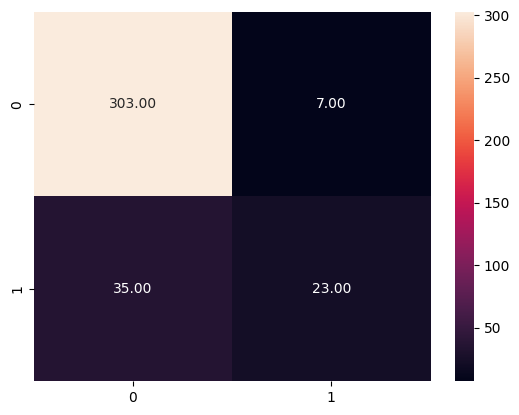

In [47]:
sns.heatmap(cm, annot=True, fmt=".2f")

#RANDOM FOREST


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = forest.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred)

0.842391304347826

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[304,   6],
       [ 52,   6]])

<Axes: >

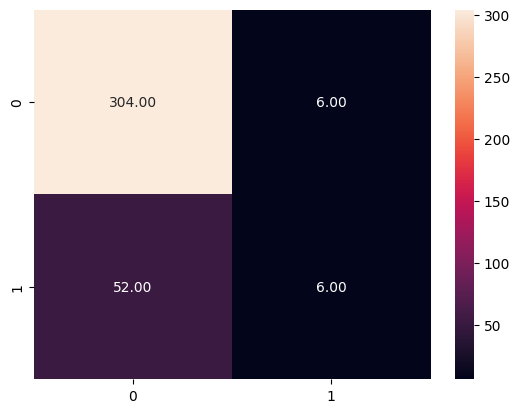

In [54]:
sns.heatmap(cm, annot=True, fmt=".2f")

In [56]:
from sklearn.metrics import classification_report

# Agora você pode usar a função
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       310
           1       0.50      0.10      0.17        58

    accuracy                           0.84       368
   macro avg       0.68      0.54      0.54       368
weighted avg       0.80      0.84      0.80       368



#REDES NEURAIS ARTIFICIAIS


In [57]:
import tensorflow as tf

In [59]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
rede_neural.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,951 (7.62 KB)

 Trainable params: 1,951 (7.62 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [69]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0018 
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0019 
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0019 
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0021 
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0020     
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0027 
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0021 
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0020     
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0015     
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0018 
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0014     
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━

In [70]:
y_pred = rede_neural.predict(X_test)
y_pred

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[3.56592864e-05],
       [9.92569566e-01],
       [5.09506793e-15],
       [9.99999642e-01],
       [2.94901906e-26],
       [5.44229616e-25],
       [1.84748405e-05],
       [3.77702369e-10],
       [2.68066236e-09],
       [5.82334993e-04],
       [2.15941238e-23],
       [1.92327597e-15],
       [4.32002914e-12],
       [6.10579737e-29],
       [9.99988914e-01],
       [3.74937765e-02],
       [1.11096820e-12],
       [7.00552333e-12],
       [8.69182050e-01],
       [3.65366646e-21],
       [1.77621114e-05],
       [9.98902082e-01],
       [1.79861213e-11],
       [1.49793248e-18],
       [8.34950695e-25],
       [6.03620496e-15],
       [5.32295189e-14],
       [8.51763679e-16],
       [1.36648509e-20],
       [1.34562682e-22],
       [2.29181563e-10],
       [2.07777950e-09],
       [5.06554123e-08],
       [8.17191765e-16],
       [4.16212167e-08],
       [8.99239967e-05],
       [1.67661549e-30],
       [1.86375257e-17],
       [6.87586025e-15],
       [1.55828783e-09],


In [71]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [72]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[280,  30],
       [ 33,  25]])

<Axes: >

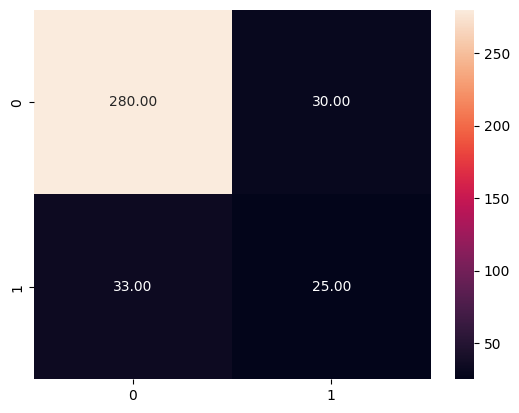

In [73]:
sns.heatmap(cm, annot=True, fmt=".2f")

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       310
           1       0.45      0.43      0.44        58

    accuracy                           0.83       368
   macro avg       0.67      0.67      0.67       368
weighted avg       0.83      0.83      0.83       368



#Salvar o classificador
**negrito**

In [75]:
import pickle

In [76]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder,logistic],f)

In [91]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [92]:
min_max, encoder, model

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())

In [177]:
X_novo = employee_df.iloc[1:2]
X_novo


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [179]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married


In [180]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()
X_cat_novo

array([[0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [181]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [182]:
X_numerical_novo = X_novo.drop(columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','Attrition'])

In [183]:
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7


In [188]:
# Suponha que X_cat_novo e X_numerical_novo sejam os DataFrames que você deseja concatenar

# Resetando o índice
X_cat_novo = X_cat_novo.reset_index(drop=True)
X_numerical_novo = X_numerical_novo.reset_index(drop=True)

# Concatenando os DataFrames
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis=1)

# Exibindo o resultado
X_all_novo


,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7


In [189]:
X_all_novo.columns = X_all_novo.columns.astype(str)
X_novo = min_max.transform(X_all_novo)

In [190]:
X_novo

array([[0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.73809524, 0.12670007, 0.25      , 0.        ,
        0.66666667, 0.44285714, 0.33333333, 0.25      , 0.33333333,
        0.21700895, 0.9160008 , 0.11111111, 0.        , 0.85714286,
        1.        , 1.        , 0.33333333, 0.25      , 0.5       ,
        0.66666667, 0.25      , 0.38888889, 0.06666667, 0.41176471]])

In [191]:
model.predict_proba(X_novo)

array([[0.97920531, 0.02079469]])

In [194]:
resultado = lambda x: "sair" if x == 1 else "ficar"

# Supondo que X_novo seja o dado para prever
previsao = model.predict(X_novo)[0]  # Pega o primeiro resultado da previsão, se for uma array

print(f"O funcionário vai {resultado(previsao)}")


O funcionário vai ficar
